In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
cd drive/MyDrive/Parkinson/

/content/drive/MyDrive/Parkinson


In [11]:
pwd

'/content/drive/MyDrive/Parkinson'

# UPDRS (Unified Parkinson's disease rating scale) regression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Load datset (UCI data)
df = pd.read_csv("parkinsons_updrs.data")

In [17]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [19]:
# Prepare features and target

# drop columns not needed for prediction
X = df.drop(columns=["subject#", "motor_UPDRS", "total_UPDRS"])
y = df["total_UPDRS"] # Continuous target variable

In [20]:
# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [33]:
# Train a regression model
model = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42, verbose=1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

In [34]:
# Predict and evaluate the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error(MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("R-squared: ", r2)

Mean Absolute Error(MAE):  0.7164561080851053
Mean Squared Error (MSE):  2.5747783976111958
R-squared:  0.9767646630717071


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


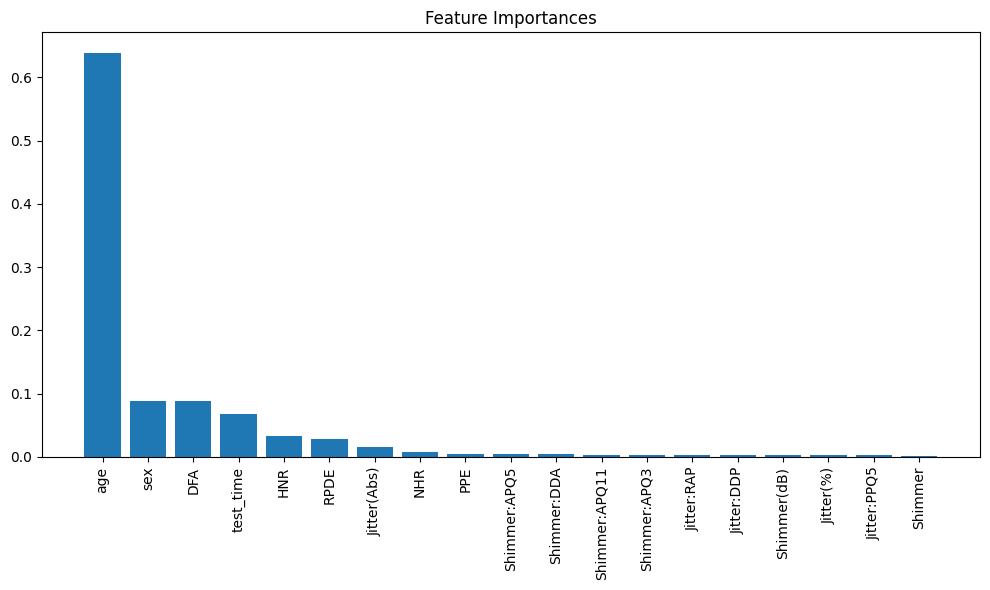

In [35]:
# Visualzie feature importance
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [38]:
# === 1. Import libraries ===
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# === 2. Load the dataset from UCI ===

df = pd.read_csv("parkinsons_updrs.data")

# Remove bad header row (first row duplicated as data)
df = df[df["age"] != "age"]
df = df.astype(float)

# === 3. Prepare features and target ===
X = df.drop(columns=["subject#", "motor_UPDRS", "total_UPDRS"])
y = df["total_UPDRS"]

# === 4. Normalize input features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 5. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# === 6. Define models ===
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

# === 7. Train and evaluate each model ===
results = []

for name, model in tqdm(models.items(), desc="Training models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    })



Training models: 100%|██████████| 5/5 [00:13<00:00,  2.64s/it]


In [43]:
# === 8. Show and sort results ===
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

              Model       MAE        MSE  R2 Score
3      RandomForest  0.716456   2.574778  0.976765
4  GradientBoosting  3.745002  23.240978  0.790269
0  LinearRegression  8.053791  93.306721  0.157981
1             Ridge  8.056159  93.339283  0.157687
2             Lasso  8.263207  99.060893  0.106054


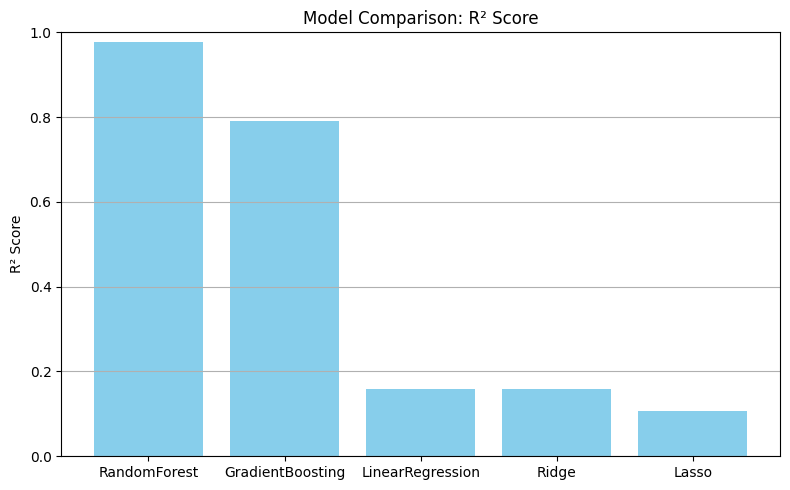

In [44]:
# === 9. (Optional) Visualize R² Scores ===
plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["R2 Score"], color="skyblue")
plt.ylabel("R² Score")
plt.title("Model Comparison: R² Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

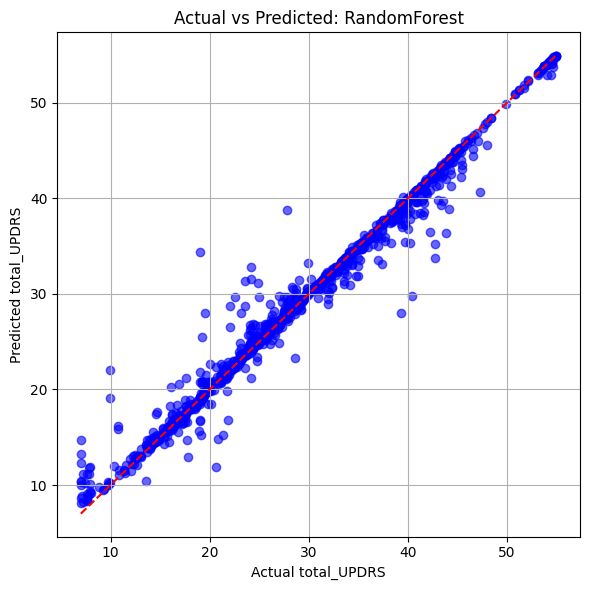

In [45]:
# === 10. Actual vs Predicted Scatter Plot for Best Model ===
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]  # already trained

y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_best_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title(f"Actual vs Predicted: {best_model_name}")
plt.grid(True)
plt.tight_layout()
plt.show()


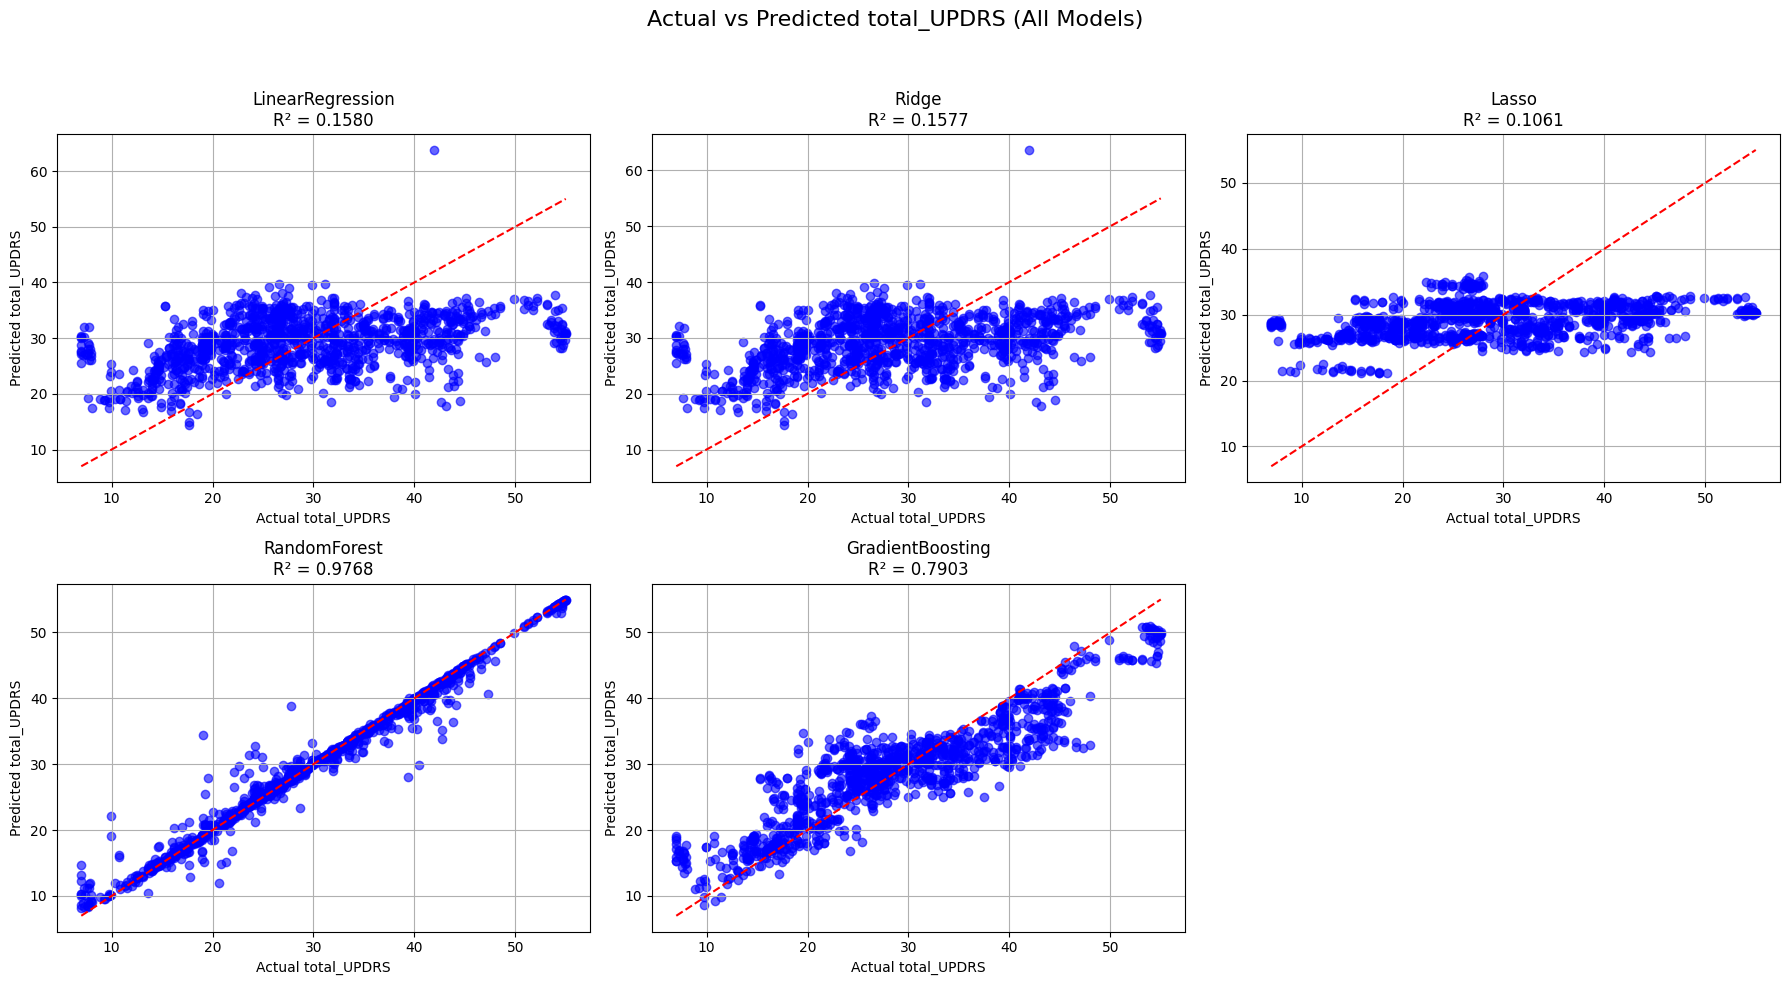

In [48]:
# === Draw scatter plots for each model (with R² scores) ===
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    # Predict using each model
    y_pred = model.predict(X_test)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred)

    # Plot actual vs predicted
    axes[idx].scatter(y_test, y_pred, alpha=0.6, color='blue')
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[idx].set_title(f"{name}\nR² = {r2:.4f}", fontsize=12)
    axes[idx].set_xlabel("Actual total_UPDRS")
    axes[idx].set_ylabel("Predicted total_UPDRS")
    axes[idx].grid(True)

# Hide unused subplot if any
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle("Actual vs Predicted total_UPDRS (All Models)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [46]:
from sklearn.model_selection import cross_val_score, KFold

# === 11. Cross-validation (R²) for best model ===
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_scaled, y, cv=cv, scoring='r2')

print(f"Cross-validated R² mean: {cv_scores.mean():.4f}")
print(f"Cross-validated R² std: {cv_scores.std():.4f}")


Cross-validated R² mean: 0.9713
Cross-validated R² std: 0.0084
